In [22]:
import pandas as pd
import numpy as np
import bz2
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
import pickle
import os
from extraction_helpers import *

In [23]:
filename_1 = open("extracted_data/output_2019 speakers_False keywords_['greenhouse', 'global warming'].pickle", "rb")
dict_df_1 = pickle.load(filename_1)

filename_2 = open("extracted_data/output_2020 speakers_False keywords_['greenhouse', 'global warming'].pickle", "rb")
dict_df_2 = pickle.load(filename_2)

filename_3 = open("extracted_data/output_2019 speakers_False keywords_['hurricane', 'climate change'].pickle", "rb")
dict_df_3 = pickle.load(filename_3)

filename_4 = open("extracted_data_other/output_2020 speakers_False keywords_['hurricane', 'climate change'].pickle", "rb")
dict_df_4 = pickle.load(filename_4)

In [24]:
for keyword in dict_df_1:
    for index, row in dict_df_1[keyword].iterrows():
        dict_df_1[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])


for keyword in dict_df_2:
    for index, row in dict_df_2[keyword].iterrows():
        dict_df_2[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])


for keyword in dict_df_3:
    for index, row in dict_df_3[keyword].iterrows():
        dict_df_3[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])


for keyword in dict_df_4:
    for index, row in dict_df_4[keyword].iterrows():
        dict_df_4[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])


C:\Users\renpe\AppData\Local\Temp/ipykernel_13208/3595854150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_1[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])
C:\Users\renpe\AppData\Local\Temp/ipykernel_13208/3595854150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_2[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])
C:\Users\renpe\AppData\Local\Temp/ipykernel_13208/3595854150.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [25]:
for keyword in dict_df_1:
    dict_df_1[keyword] = dict_df_1[keyword].sort_values('date', ascending=True)
    
for keyword in dict_df_2:
    dict_df_2[keyword] = dict_df_2[keyword].sort_values('date', ascending=True)
    
for keyword in dict_df_3:
    dict_df_3[keyword] = dict_df_3[keyword].sort_values('date', ascending=True)
    
for keyword in dict_df_4:
    dict_df_4[keyword] = dict_df_4[keyword].sort_values('date', ascending=True)

In [26]:
quota_df_greenhouse_2019=dict_df_1[ 'greenhouse']
quota_df_globalwarming_2019=dict_df_1[ 'global warming']
quota_df_greenhouse_2020=dict_df_2[ 'greenhouse']
quota_df_globalwarming_2020=dict_df_2[ 'global warming']
quota_df_climatechange_2019=dict_df_3[ 'climate change']
quota_df_climatechange_2020=dict_df_4[ 'climate change']

In [27]:
quota_df_greenhouse_2019_2 = quota_df_greenhouse_2019[quota_df_greenhouse_2019['quotation'].str.contains('greenhouse effect|greenhouse gas',case=False)]
print(quota_df_greenhouse_2019_2.shape)

quota_df_greenhouse_2020_2 = quota_df_greenhouse_2020[quota_df_greenhouse_2019['quotation'].str.contains('greenhouse effect|greenhouse gas',case=False)]
print(quota_df_greenhouse_2020_2.shape)

(4364, 10)
(895, 10)


C:\Users\renpe\AppData\Local\Temp/ipykernel_13208/2978004640.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  quota_df_greenhouse_2020_2 = quota_df_greenhouse_2020[quota_df_greenhouse_2019['quotation'].str.contains('greenhouse effect|greenhouse gas',case=False)]


In [28]:
quota_df = pd.concat([quota_df_greenhouse_2019_2,quota_df_greenhouse_2020_2,quota_df_globalwarming_2019,quota_df_globalwarming_2020,quota_df_climatechange_2019,quota_df_climatechange_2020])
quota_df.shape

(54165, 10)

In [29]:
quota_df['date']=pd.to_datetime(quota_df['date'])
quota_df.sort_values(by ='date',axis=0,ascending=True, inplace=True)

In [30]:
data = 'data/emdat.csv'

#select useful columns
col_list = \
["Dis No","Year", "Disaster Group", "Disaster Subgroup", "Dis Mag Value", "Dis Mag Scale",
 "Disaster Type", "Disaster Subtype", "Disaster Subsubtype",
 "Event Name", "Country", "ISO", "Region", "Continent", "Origin","OFDA Response","Appeal","Declaration","Aid Contribution",
 "Start Year", "Start Month", "Start Day", "End Year", "End Month", "Latitude","Longitude",
 "End Day", "Total Deaths", "No Injured", "No Affected", "No Homeless", 
 "Total Affected", "Reconstruction Costs ('000 US$)", 
 "Insured Damages ('000 US$)","Total Damages ('000 US$)"]

df_emdat = pd.read_csv(data, usecols=col_list, index_col="Dis No")
print(df_emdat.shape)

(2164, 34)


In [31]:
#Checking for data vacancies and romove some vacancy rows
num = df_emdat.isna().sum()
print(num)
num_list = \
["Total Deaths", "Total Affected","Start Month","Start Day","End Month","End Day",
 "Total Damages ('000 US$)"]
df_emdat = df_emdat.dropna(axis=0, how='any',subset=num_list)
print(df_emdat.shape)

Year                                  0
Disaster Group                        0
Disaster Subgroup                     0
Disaster Type                         0
Disaster Subtype                    645
Disaster Subsubtype                1930
Event Name                         1713
Country                               0
ISO                                   0
Region                                0
Continent                             0
Origin                             1279
OFDA Response                      2066
Appeal                             2144
Declaration                        1948
Aid Contribution                   2162
Dis Mag Value                      1533
Dis Mag Scale                       143
Latitude                           1769
Longitude                          1771
Start Year                            0
Start Month                          10
Start Day                           165
End Year                              0
End Month                             0


In [32]:
#use data befor 2020
df_emdat = df_emdat[df_emdat['Start Year'] <= 2020]
print(df_emdat.shape)

#sort data
date_cols = ["Start Year", "Start Month", "Start Day",
             "End Year", "End Month", "End Day"]
df_emdat = df_emdat.sort_values(by=date_cols)

# Combine start date into single olumn 
df_emdat_start = df_emdat[["Start Year", "Start Month", "Start Day"]].copy()
df_emdat_start.columns = ["year", "month", "day"]
df_emdat["StartDate"] = pd.to_datetime(df_emdat_start)

# Combine end date into single column 
df_emdat_end = df_emdat[["End Year", "End Month", "End Day"]].copy()
df_emdat_end.columns = ["year", "month", "day"]
df_emdat["EndDate"] = pd.to_datetime(df_emdat_end)


df_emdat.drop(date_cols, axis=1, inplace=True)
print(df_emdat.shape)

(521, 34)
(521, 30)


In [33]:
#set death score
list_death = []

for index, value in df_emdat["Total Deaths"].iteritems():
    current = value
    k = 0
    for index_, value_ in df_emdat["Total Deaths"].iteritems():
        if current > value_:
            k = k+1
    per = k/521
    list_death.append(per)
    
df_emdat['Death score'] = list_death


#set affected score
list_affected = []
for index, value in df_emdat["Total Affected"].iteritems():
    current = value
    k = 0
    for index_, value_ in df_emdat["Total Affected"].iteritems():
        if current > value_:
            k = k+1
    per = k/521
    list_affected.append(per)
    
df_emdat['Affected score'] = list_affected


# set damage score
list_damage = []
for index, value in df_emdat["Total Damages ('000 US$)"].iteritems():
    current = value
    k = 0
    for index_, value_ in df_emdat["Total Damages ('000 US$)"].iteritems():
        if current > value_:
            k = k+1
    per = k/521
    list_damage.append(per)
    
df_emdat['Damage score'] = list_damage


#generate whole severity score
df_emdat_processed = df_emdat.copy()
list_severe=np.sum([list_death,list_affected,list_damage],axis=0).tolist()
df_emdat_processed['Severe score'] = list_severe
print(df_emdat_processed['Severe score'].describe())
df_emdat_processed.head()

count    521.000000
mean       1.479032
std        0.648609
min        0.109405
25%        0.978887
50%        1.408829
75%        1.976967
max        2.944338
Name: Severe score, dtype: float64


,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,...,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),StartDate,EndDate,Death score,Affected score,Damage score,Severe score
Dis No,,,,,,,,,,,,,,,,,,,,,
2015-0011-MWI,2015,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Malawi,MWI,Eastern Africa,...,638645.0,NaN,NaN,390000.0,2015-01-01,2015-01-21,0.950096,0.857965,0.644914,2.452975
2015-0016-MDG,2015,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Chedza',Madagascar,MDG,Eastern Africa,...,174007.0,NaN,NaN,36000.0,2015-01-16,2015-01-17,0.865643,0.748560,0.295585,1.909789
2015-0017-PHL,2015,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Amang' (Mekkhala),Philippines (the),PHL,South-Eastern Asia,...,21687.0,NaN,NaN,1000.0,2015-01-19,2015-01-19,0.055662,0.541267,0.019194,0.616123
2015-0074-MDG,2015,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Fundi',Madagascar,MDG,Eastern Africa,...,8430.0,NaN,NaN,10000.0,2015-02-07,2015-02-08,0.291747,0.389635,0.142035,0.823417
2015-0044-ARG,2015,Natural,Meteorological,Storm,Convective storm,Rain,NaN,Argentina,ARG,South America,...,4500.0,NaN,NaN,17200.0,2015-02-15,2015-02-24,0.349328,0.307102,0.207294,0.863724


In [34]:
df_emdat_processed = df_emdat_processed[(df_emdat_processed["Disaster Type"] != "Earthquake")]
print(df_emdat_processed.shape)

(471, 34)


In [10]:
#Intensity of reports on climate change in the next 7 days, quota after 2020-4-16 is vacant

day_array=np.arange('2019-01-01', '2020-04-09', dtype='datetime64[D]')

num_quota_list = []
total_occur_list = []

for day in day_array:
    next_day = day + np.timedelta64(7, 'D')
    mask = ((quota_df['date'] >= day ) & (quota_df['date'] < next_day))
    intervel_occr = quota_df.loc[mask]
    s = intervel_occr["numOccurrences"].sum()
    t = intervel_occr.shape[0]
    num_quota_list.append(t)
    total_occur_list.append(s)
dict_stat = {"num_quota": num_quota_list,"total_occur": total_occur_list}
num_occur_stat = pd.DataFrame(dict_stat)

num_occur_stat['time'] = day_array
num_occur_stat.index = day_array
num_occur_stat.head(10)

,num_quota,total_occur,time
2019-01-01,382,1049.0,2019-01-01
2019-01-02,444,959.0,2019-01-02
2019-01-03,475,1064.0,2019-01-03
2019-01-04,519,1235.0,2019-01-04
2019-01-05,539,1299.0,2019-01-05
2019-01-06,543,1323.0,2019-01-06
2019-01-07,546,1432.0,2019-01-07
2019-01-08,534,1355.0,2019-01-08
2019-01-09,543,1401.0,2019-01-09
2019-01-10,575,1666.0,2019-01-10


In [37]:
#match to find disaster happen date
tmplist_1 = df_emdat_processed["StartDate"].tolist()
tmplist_2 = num_occur_stat['time'].tolist()
print(len(tmplist_1),len(tmplist_2))

#match date
tmp = [val for val in tmplist_1 if val in tmplist_2]
for x in tmp:
    x = x.to_datetime64()
    
occur_stat_match = num_occur_stat.isin(tmp)


tmplist_3 = occur_stat_match["time"].tolist()

occur_stat_2 = num_occur_stat.copy()

occur_stat_2['match'] = tmplist_3

matchresult = occur_stat_2.drop(occur_stat_2[occur_stat_2['match']==False].index)
matchresult.shape

471 464


(57, 4)

In [39]:
#compare with baseline
print("match date stat:","\n",matchresult.describe())
print("all date stat:","\n",num_occur_stat.describe())
print("match date median of total number of different quota:","\n",matchresult['num_quota'].median())
print("all date median of total number of different quota:","\n",num_occur_stat['num_quota'].median())
print("match date median of total number of related quota occurence:","\n",matchresult['total_occur'].median())
print("all date median of total number of related quota occurence:","\n",num_occur_stat['total_occur'].median())

match date stat: 
          num_quota  total_occur
count    57.000000    57.000000
mean    805.947368  2831.807018
std     286.382326  1234.498893
min     161.000000   215.000000
25%     664.000000  1953.000000
50%     851.000000  2794.000000
75%     991.000000  3697.000000
max    1904.000000  7142.000000
all date stat: 
          num_quota  total_occur
count   464.000000   464.000000
mean    812.446121  2801.952586
std     274.371415  1185.697827
min     158.000000   205.000000
25%     680.500000  1999.250000
50%     848.000000  2787.000000
75%     957.500000  3555.000000
max    2070.000000  7804.000000
match date median of total number of different quota: 
 851.0
all date median of total number of different quota: 
 848.0
match date median of total number of related quota occurence: 
 2794.0
all date median of total number of related quota occurence: 
 2787.0


From the above statistics, we can conclude that the occurrence of disasters has played a minimal role in triggering discussions on topics related to climate change, etc.

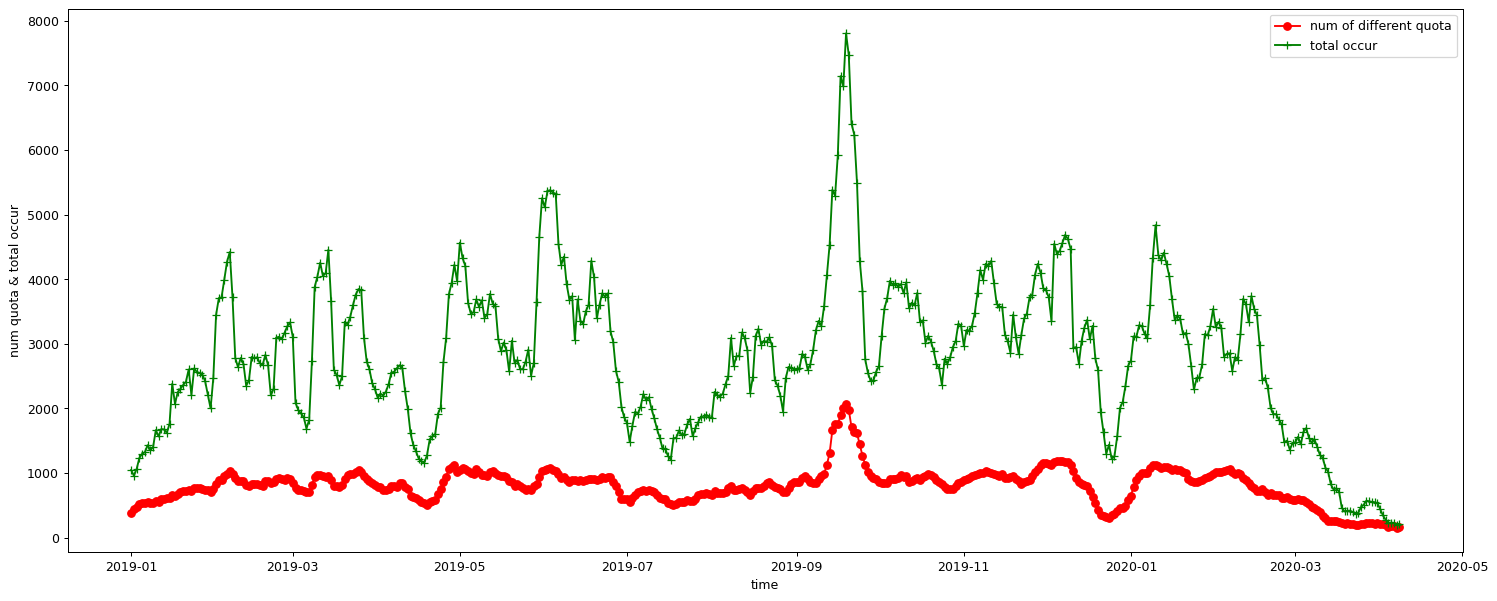

In [54]:
#affected by other big events
time1 = num_occur_stat["num_quota"]
time2 = num_occur_stat["total_occur"]
time = num_occur_stat["time"]

#l1 = plt.plot(time, time1, 'r--', label='num_quota')
#l2 = plt.plot(time, time2, 'g--', label='total_occur')

plt.figure(figsize=(20,8),dpi=90)

plt.plot(time, time1 , 'ro-', time, time2, 'g+-')
#plt.figure(figsize=(20, 8))
plt.title('')
plt.xlabel('time')
plt.ylabel('num quota & total occur')
plt.legend(["num of different quota","total occur"])
plt.show()

In [55]:
dis_match = df_emdat_processed["StartDate"].isin(tmp)
print(dis_match.describe())

tmplist_4 = dis_match.tolist()
df_emdat_processed_2 = df_emdat_processed.copy()
df_emdat_processed_2["match"] = tmplist_4
print(df_emdat_processed_2.shape)

dis_matchresult = df_emdat_processed_2.drop(df_emdat_processed_2[df_emdat_processed_2['match']==False].index)
print(dis_matchresult.shape)


count       471
unique        2
top       False
freq        410
Name: StartDate, dtype: object
(471, 35)
(61, 35)


In [56]:
dis_matchresult.sort_values('Severe score', ascending=False,inplace=False)

dis_matchresult.drop_duplicates(subset = "StartDate",inplace=True)

dis_matchresult.sort_values('StartDate', ascending=True,inplace=False)

print(dis_matchresult.shape)

(57, 35)


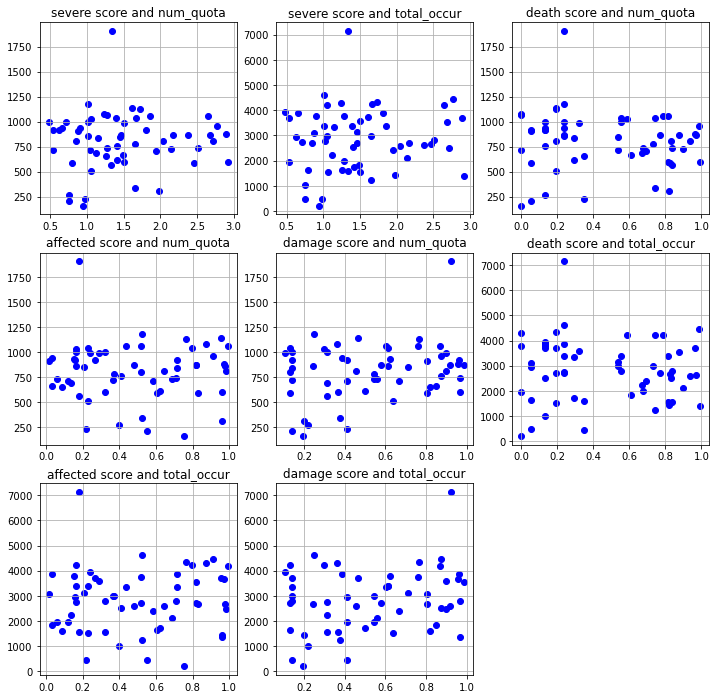

In [57]:
"""
Intuitively analysis the correlation between the severity of disasters and the intensity of discussions on topics 
such as "climate change" and "global warming" by plot
"""

plt.figure(figsize = (12,12))
plt.subplot(3, 3, 1)
plt.scatter(dis_matchresult['Severe score'], matchresult['num_quota'],color="blue")
plt.grid()  
plt.title('severe score and num_quota')
  

plt.subplot(3, 3, 2)
plt.scatter(dis_matchresult['Severe score'], matchresult['total_occur'],color="blue")
plt.grid() 
plt.title('severe score and total_occur')



plt.subplot(3, 3, 3)
plt.scatter(dis_matchresult['Death score'], matchresult['num_quota'],color="blue")
plt.grid()  
plt.title('death score and num_quota')


plt.subplot(3, 3, 4)
plt.scatter(dis_matchresult['Affected score'], matchresult['num_quota'],color="blue")
plt.grid()  
plt.title('affected score and num_quota')


plt.subplot(3, 3, 5)
plt.scatter(dis_matchresult['Damage score'], matchresult['num_quota'],color="blue")
plt.grid()  
plt.title('damage score and num_quota')


plt.subplot(3, 3, 6)
plt.scatter(dis_matchresult['Death score'], matchresult['total_occur'],color="blue")
plt.grid()  
plt.title('death score and total_occur')
  

plt.subplot(3, 3, 7)
plt.scatter(dis_matchresult['Affected score'], matchresult['total_occur'],color="blue")
plt.grid() 
plt.title('affected score and total_occur')


plt.subplot(3, 3, 8)
plt.scatter(dis_matchresult['Damage score'], matchresult['total_occur'],color="blue")
plt.grid()  
plt.title('damage score and total_occur')
plt.show()


In [58]:
#calculate correlation value
import scipy.stats as stats

r1,p1 = stats.pearsonr(dis_matchresult['Severe score'],matchresult['num_quota'])
print('Correlation coefficient between severe score and num_quota  r is = %6.3f，p value is = %6.3f'%(r1,p1))

r2,p2 = stats.pearsonr(dis_matchresult['Severe score'],matchresult['total_occur'])
print('Correlation coefficient between severe score and total_occur  r is = %6.3f，p value is = %6.3f'%(r2,p2))

r3,p3 = stats.pearsonr(dis_matchresult['Death score'],matchresult['num_quota'])
print('Correlation coefficient between death score and num_quota  r is = %6.3f，p value is = %6.3f'%(r3,p3))

r4,p4 = stats.pearsonr(dis_matchresult['Affected score'],matchresult['num_quota'])
print('Correlation coefficient between affected score and num_quota  r is = %6.3f，p value is = %6.3f'%(r4,p4))

r5,p5 = stats.pearsonr(dis_matchresult['Damage score'],matchresult['num_quota'])
print('Correlation coefficient between damage score and num_quota  r is = %6.3f，p value is = %6.3f'%(r5,p5))

r6,p6 = stats.pearsonr(dis_matchresult['Death score'],matchresult['total_occur'])
print('Correlation coefficient between death score and total_occur  r is = %6.3f，p value is = %6.3f'%(r6,p6))

r7,p7 = stats.pearsonr(dis_matchresult['Affected score'],matchresult['total_occur'])
print('Correlation coefficient between affected score and total_occur  r is = %6.3f，p value is = %6.3f'%(r7,p7))

r8,p8 = stats.pearsonr(dis_matchresult['Damage score'],matchresult['total_occur'])
print('Correlation coefficient between damage score and total_occur  r is = %6.3f，p value is = %6.3f'%(r8,p8))

Correlation coefficient between severe score and num_quota  r is =  0.056，p value is =  0.678
Correlation coefficient between severe score and total_occur  r is =  0.099，p value is =  0.462
Correlation coefficient between death score and num_quota  r is = -0.076，p value is =  0.572
Correlation coefficient between affected score and num_quota  r is = -0.043，p value is =  0.753
Correlation coefficient between damage score and num_quota  r is =  0.262，p value is =  0.049
Correlation coefficient between death score and total_occur  r is = -0.061，p value is =  0.650
Correlation coefficient between affected score and total_occur  r is =  0.049，p value is =  0.720
Correlation coefficient between damage score and total_occur  r is =  0.247，p value is =  0.064


From scatter map, Correlation coefficient and p value, We also found no correlation between the severity of the disaster and the hotness of discussion on the topic of climate change. The only slight link to the intensity of discussion on climate change related topics is property damage.

In [93]:
matchresult_sort_bytotaloccur = matchresult.copy()
matchresult_sort_bytotaloccur.sort_values(by = "total_occur",ascending=False,inplace = True)

matchresult_sort_bynumquota = matchresult.copy()
matchresult_sort_bynumquota.sort_values(by = "num_quota",ascending=False,inplace = True)

dis_matchresult_sortbytotaloccur = dis_matchresult.copy()
sort_list1 = matchresult_sort_bytotaloccur["time"].tolist()
dis_matchresult_sortbytotaloccur.index = dis_matchresult_sortbytotaloccur["StartDate"]
dis_sort_totaloccur = dis_matchresult_sortbytotaloccur.loc[sort_list1]
append_list_1 = matchresult_sort_bytotaloccur["num_quota"]
append_list_2 = matchresult_sort_bytotaloccur['total_occur']
dis_sort_totaloccur['num_quota'] = append_list_1
dis_sort_totaloccur['total_occur'] = append_list_2
#dis_sort_totaloccur



In [94]:


compare_country = dis_sort_totaloccur.groupby("Country")
country_sum = compare_country.sum()
country_sum   = country_sum[["Severe score","num_quota","total_occur"]]
print(country_sum.shape)


def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

country_sum = mean_norm(country_sum)
country_sum.head(5)



(31, 3)


,Severe score,num_quota,total_occur
Country,,,
Argentina,-0.964594,-0.459143,-0.342570
Australia,-0.579981,-0.594208,-0.608481
Bahamas (the),-0.154703,-0.502528,-0.588289
Bangladesh,-0.464766,-0.361732,-0.219597
Bolivia (Plurinational State of),-0.752803,-0.399387,-0.547449


In [95]:
for index, row in country_sum.iterrows():
    mean = np.mean(row)
    std = np.std(row)
    for i in range(len(row)):
        row[i] = (row[i]- mean)/std
    

country_sum["country"] = country_sum.index
country_sum.head(10)

,Severe score,num_quota,total_occur,country
Country,,,,
Argentina,-1.392068,0.480139,0.911929,Argentina
Australia,1.224093,0.001303,-1.225396,Australia
Bahamas (the),1.389334,-0.465945,-0.923389,Bahamas (the)
Bangladesh,-1.154750,-0.129671,1.284421,Bangladesh
Bolivia (Plurinational State of),-1.285308,1.153523,0.131785,Bolivia (Plurinational State of)
Brazil,-0.613814,1.410276,-0.796463,Brazil
Canada,-1.412662,0.648974,0.763688,Canada
China,1.409368,-0.805984,-0.603383,China
Egypt,1.410974,-0.788335,-0.622639,Egypt


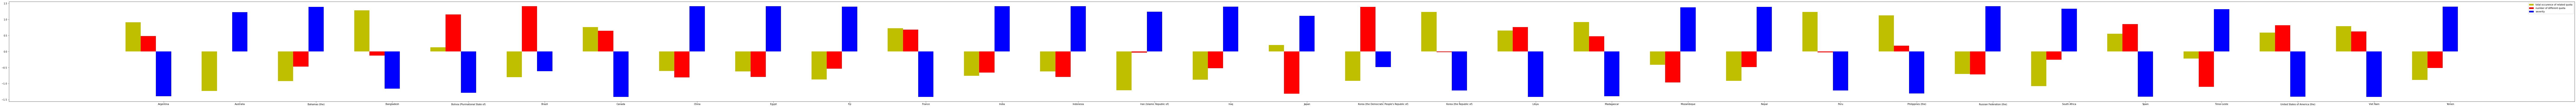

In [96]:
country_list = country_sum["country"].tolist()
severity_list_country = country_sum['Severe score'].tolist()


num_quota_list_country = country_sum['num_quota'].tolist()


total_occur_list_country = country_sum['total_occur'].tolist()



x =list(range(len(total_occur_list_country)))
total_width, n = 0.4, 2
width = total_width / n
plt.figure(figsize=(200, 8))
plt.bar(x, total_occur_list_country, width=width, label='total occurence of related quota',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_quota_list_country, width=width, label='number of different quota',tick_label = country_list,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, severity_list_country, width=width, label='severity',tick_label = country_list,fc = 'b')
        
plt.legend()
plt.show()

In [97]:
compare_region = dis_sort_totaloccur.groupby("Region")
region_sum = compare_region.sum()
#region_sum["region"] = region_sum.index
region_sum  = region_sum[["Severe score","num_quota","total_occur"]]
print(region_sum.shape)


region_sum = mean_norm(region_sum)


for index, row in region_sum.iterrows():
    mean = np.mean(row)
    std = np.std(row)
    for i in range(len(row)):
        row[i] = (row[i]- mean)/std
    

region_sum["region"] = region_sum.index
region_sum.head(10)

(15, 3)


,Severe score,num_quota,total_occur,region
Region,,,,
Australia and New Zealand,1.308930,-1.118176,-0.190754,Australia and New Zealand
Caribbean,1.410311,-0.614236,-0.796075,Caribbean
Eastern Africa,0.276537,-1.339370,1.062834,Eastern Africa
Eastern Asia,1.407874,-0.819770,-0.588105,Eastern Asia
Eastern Europe,1.402040,-0.861371,-0.540669,Eastern Europe
Melanesia,1.414198,-0.712888,-0.701310,Melanesia
Northern Africa,1.399829,-0.874150,-0.525679,Northern Africa
Northern America,-1.410013,0.799329,0.610684,Northern America
South America,-1.361819,1.011191,0.350628,South America


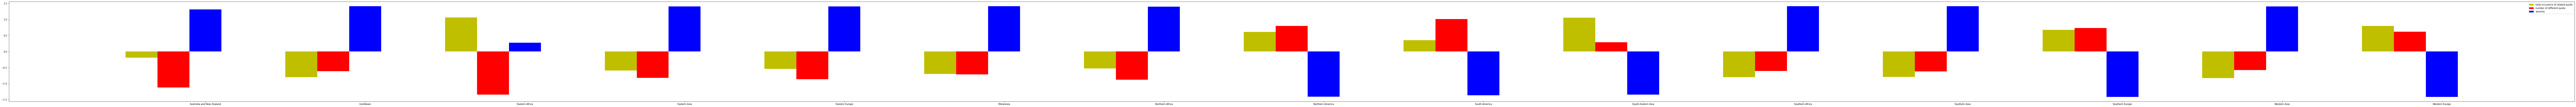

In [98]:
region_list = region_sum["region"].tolist()
severity_list_region = region_sum['Severe score'].tolist()
#severity_list_region = [i + 1 for i in severity_list_region]

num_quota_list_region = region_sum['num_quota'].tolist()
#num_quota_list_region = [i + 1 for i in num_quota_list_region]

total_occur_list_region = region_sum['total_occur'].tolist()
#total_occur_list_region = [i + 1 for i in total_occur_list_region]


x =list(range(len(total_occur_list_region)))
total_width, n = 0.4, 2
width = total_width / n
plt.figure(figsize=(200, 8))
plt.bar(x, total_occur_list_region, width=width, label='total occurence of related quota',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_quota_list_region, width=width, label='number of different quota',tick_label = region_list,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, severity_list_region, width=width, label='severity',tick_label = region_list,fc = 'b')
        
plt.legend()
plt.show()